1 Import and Install Dependencies

In [1]:
!pip install tensorflow==2.5.1 tensorflow-gpu==2.5.1 opencv-python mediapipe sklearn matplotlib


[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import cv2
import numpy as np  #help with arrays
import os       #makes is eaier t work with file paths
from matplotlib import pyplot as plt   #visualize images
import time       #to take a sleep between  each frame that we collect
import mediapipe as mp

2 Keypoint Using MP Holistic

In [2]:
#two variables one for mediapipe holistics and one for mediapipe drawing utilities
#holistics will be downloading that model and levaraging the model
# the drawing utility is going to make it easier to draw the keypoints on our face
mp_holistic = mp.solutions.holistic #holistic model
mp_drawing = mp.solutions.drawing_utils #drawing utilities

In [3]:
#function to make our detection
#variable for image and model
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #color conversion bgr to rgb
    image.flags.writeable = False                  #sets our image writable status to false, our image is ....
    results = model.process(image)                 #make prediction
    image.flags.writeable = True                   #image is now writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) #color conversion rgb to bgr
    return image, results                          

In [4]:
def draw_landmarks(image, results):
    #helper function that comes with mediapipe that makes it easier to draw landmarks onto an image
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)#Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)#draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)#draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)#draw right hand connections

In [5]:
def draw_styled_landmarks(image, results):
    #Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             )
    #draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             )        #first line to color landmark(dot) the second colors connection(line)
    #draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             )
    #draw right hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             )

In [6]:
mp_drawing.draw_landmarks??
#landmark drawing spec-what formatting to be applied to the dots and effectively the joins
#connection drawing spec-what format to be applied to the connections

In [16]:
results

mediapipe.python.solution_base.SolutionOutputs

In [17]:
draw_landmarks(frame, results)

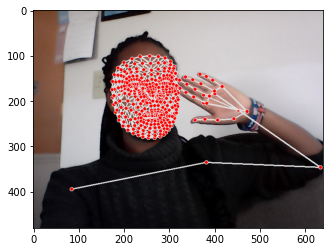

In [18]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [15]:
#ensure we can access our webcam using opencv
#apply a secondary layer where we are actually going to make detections using media pipe
cap = cv2.VideoCapture(0) #effectively accessing our webcam
#access or set the mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    #double checking that we're still accesing our webcam and loop through all our frames in our webcam
   
    while cap.isOpened():
        #Read feed from our webcam
        ret, frame = cap.read()
        
        #make detections
        image, results = mediapipe_detection(frame, holistic)
        
        #Draw landmarks
        draw_styled_landmarks(image, results)
        
        #print(results)
        #show to the user
        cv2.imshow('Feed', image)
        
        #breaking gracefully going to wait for a key to be pressed inside of our frame
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release() #releases our webcam
    cv2.destroyAllWindows() #closes down our frame

3 Extract Keypoint Values

In [19]:
len(results.pose_landmarks.landmark)

33

In [20]:
results.pose_landmarks.landmark[0].x

0.41255292296409607

In [21]:
pose = []
#extracted kepoint for poselandmake and stored in an array
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [22]:
#creating a list rather than a loop 
#puts its all in obe big array - flatten
#extracting arrays x,y,z the flattening it
#if we dont have results we are going to replace it with a balnk numpy array
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [23]:
len(results.left_hand_landmarks.landmark)

21

In [24]:
#replacing landamrk values with zeros in situations where we don't get landmark values
#we are still passing an array with the same shape
np.zeros(21*3).shape

(63,)

In [25]:
lh.shape

(63,)

In [27]:
pose

array([ 4.12552923e-01,  4.16869521e-01, -8.09395015e-01,  9.99967575e-01,
        4.32867438e-01,  3.54289234e-01, -7.15127110e-01,  9.99911249e-01,
        4.47697252e-01,  3.52508366e-01, -7.14408517e-01,  9.99926805e-01,
        4.61722672e-01,  3.50507349e-01, -7.13772297e-01,  9.99899983e-01,
        3.78656536e-01,  3.59731108e-01, -7.52989113e-01,  9.99913931e-01,
        3.55319798e-01,  3.62106949e-01, -7.52088249e-01,  9.99927402e-01,
        3.29450786e-01,  3.64908993e-01, -7.52246499e-01,  9.99900460e-01,
        4.70858574e-01,  3.75513434e-01, -2.56231517e-01,  9.99915838e-01,
        2.78580606e-01,  3.93653423e-01, -4.08442318e-01,  9.99941170e-01,
        4.37711716e-01,  4.94528174e-01, -6.45233214e-01,  9.99950469e-01,
        3.73179615e-01,  4.95355725e-01, -6.90799296e-01,  9.99947369e-01,
        5.98208249e-01,  6.99435771e-01, -9.56528708e-02,  9.99817371e-01,
        1.33447170e-01,  8.22692096e-01, -2.36761972e-01,  9.98991907e-01,
        9.91963983e-01,  

In [28]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose,face,lh,rh])

In [29]:
result_test = extract_keypoints(results) #[:10]

In [30]:
result_test

array([ 0.41255292,  0.41686952, -0.80939502, ...,  0.        ,
        0.        ,  0.        ])

In [31]:
np.save('0', result_test)  #saving each frame as a np array

In [32]:
np.load('0.npy') #load up array

array([ 0.41255292,  0.41686952, -0.80939502, ...,  0.        ,
        0.        ,  0.        ])

4 Set Up Folders for collection

In [33]:
#keypoints will form our frame values
#the extracted keypoints to decodebour sign language

#variable that holds path for exported data, numpy arrays
DATA_PATH =  os.path.join('MP_DATA')
#actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])
#thirty videos worth of data
no_sequences = 30
#videos are going to be thirty frames in length
sequence_length = 30

In [26]:
#folder for each action
#hello
## 0 sequence of actions 
## 1
## 2 ....
## 29
#thanks
#iloveyou
#markedirs is going to make the subdirectories as well for each video
#folder called mp data(data_path), subfolder for actions, and a sequence folder
#if folders are already created we are going to skip

In [34]:
#create folders that are going to store our data
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

5 Collecting Keypoint values for keypoint values for training and testing

In [ ]:
#loop through and take a snapshot at each point in time
#loop through each one of our actions
#30 frames per video, for 30 videos, 3 times for each action

cap = cv2.VideoCapture(0) #effectively accessing our webcam
#access or set the mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # loop through action
    for action in actions:
        #loop through sequences aka videos
        for sequence in range(no_sequences):
            #loop through video length aka sequence length
            for frame_num in range(sequence_length):
        
                #read feed
                ret, frame = cap.read()
                #make detections
                image, results = mediapipe_detection(frame, holistic)

                #Draw landmarks
                draw_styled_landmarks(image, results)
                
                #apply collection logic
                if frame_num == 0: #at frame zero we take a break
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), #position
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video number {}'.format(action, sequence), (15,12),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA) #line width, line type
                    #show to the user
                    cv2.imshow('Feed', image)
                    cv2.waitKey(2000)
                #if not at frame 0
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video number {}'.format(action, sequence), (15,12),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
                    #show to the user
                    cv2.imshow('Feed', image)
                
                #Export keypoints and save them in our folders
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)
                

                
               
                #breaking gracefully going to wait for a key to be pressed inside of our frame
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
    cap.release() #releases our webcam
    cv2.destroyAllWindows() #closes down our frame

In [29]:
cap.release() #releases our webcam
cv2.destroyAllWindows() #closes down our frame

6 Prepocess Data and get labels and features

In [35]:
from sklearn.model_selection import train_test_split # allow us to partion our data into a training and test partion
from tensorflow.keras.utils import to_categorical   #to convert data into one hot encoded data

In [36]:
#created our label map
#creating a dictionary that has  the label hello, thanks and iloveyou
#looing through our actions
label_map = {label:num for num, label in enumerate(actions)}

In [37]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [38]:
#blank arrays sequences represent feature data(x data), labels represents labels(y data)
#use features and train a model to represent the relationship between our labels
sequences, labels = [], [] 
for action in actions:
    for sequence in range(no_sequences):
        window = []    #all different frames for that particular sequence
        for frame_num in range(sequence_length):
            #load up that frame by passing the full path to a differeny numpy array   frame number and add it to the windwo
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        #after a video is done append to the sequences
        sequences.append(window)
        #appending the label and using the label map and passing it through our action
        labels.append(label_map[action])

In [39]:
np.array(sequences).shape

(90, 30, 1662)

In [40]:
np.array(labels).shape

(90,)

In [41]:
#preprocessing this to get it into a format that we can start working with
X = np.array(sequences)

In [42]:
X.shape

(90, 30, 1662)

In [43]:
y = to_categorical(labels).astype(int)

In [44]:
#converted our initial labels to a one hot encoded representation
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [45]:
y.shape

(90, 3)

In [46]:
#Training and testing partition
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.05) #test partition is going to be 5% of our data

In [47]:
y_train.shape

(85, 3)

7 Build and Train LSTM Neural Network

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard #allows us to form some logging inside of tensor board if we want to go and trace and monitor the model as it is training

In [49]:
#create a log directory and set up our tensorflow callback
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [50]:
#neural network architecture
model = Sequential()   #instantiating the model
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662))) #64 lstm units, return sequences coz the next layer will need them
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [51]:
res1=[0.7, 0.2, 0.1]
res1
np.argmax(res1)
actions[np.argmax(res1)]

'hello'

In [52]:
#compile the model and fit it
#loss-multiclass classification model
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [53]:
#fit and train our model
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 39s 9s/step - loss: 1.1205 - categorical_accuracy: 0.4471
Epoch 2/2000
3/3 [==============================] - 0s 52ms/step - loss: 2.8895 - categorical_accuracy: 0.3176
Epoch 3/2000
3/3 [==============================] - 0s 49ms/step - loss: 1.3769 - categorical_accuracy: 0.5294
Epoch 4/2000
3/3 [==============================] - 0s 54ms/step - loss: 3.0076 - categorical_accuracy: 0.5176
Epoch 5/2000
3/3 [==============================] - 0s 59ms/step - loss: 2.3881 - categorical_accuracy: 0.4118
Epoch 6/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.2931 - categorical_accuracy: 0.3765
Epoch 7/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.1767 - categorical_accuracy: 0.3882
Epoch 8/2000
3/3 [==============================] - 0s 53ms/step - loss: 1.0443 - categorical_accuracy: 0.4706
Epoch 9/2000
3/3 [==============================] - 0s 48ms/step - loss: 0.8046 - categorical_accuracy: 0.6824
Ep

KeyboardInterrupt: 

In [54]:
#what our model looks like
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 64)            442112    
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
__________________________________________________

8 Make predictions

In [55]:
res=model.predict(X_test)

In [56]:
actions[np.argmax(res[0])]

'thanks'

In [57]:
actions[np.argmax(y_test[1])]

'hello'

In [58]:
actions[np.argmax(y_test[2])]

'hello'

#### Save weights

In [59]:
model.save('action.h5')

In [75]:
 #del  model

In [60]:
#load weghts
model.load_weights('action.h5')

Evaluation using Confusion Matrix and Accuracy

In [61]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
#mmultilabel gives us a confusion matrix for each of our labels evaluates what is being detected as a true positive and true negative and a false positive and false negative


In [62]:
yhat = model.predict(X_test)

In [63]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [64]:
yhat

[1, 2, 0, 2, 0]

In [65]:
ytrue

[1, 0, 0, 2, 0]

In [66]:
multilabel_confusion_matrix(ytrue, yhat)
#confusion matrix of the shape 2,2

array([[[2, 0],
        [1, 2]],

       [[4, 0],
        [0, 1]],

       [[3, 1],
        [0, 1]]], dtype=int64)

In [67]:
accuracy_score(ytrue, yhat)

0.8

11 Test in Realtime

In [83]:
colors = [(125,117,16), (177,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    return output_frame

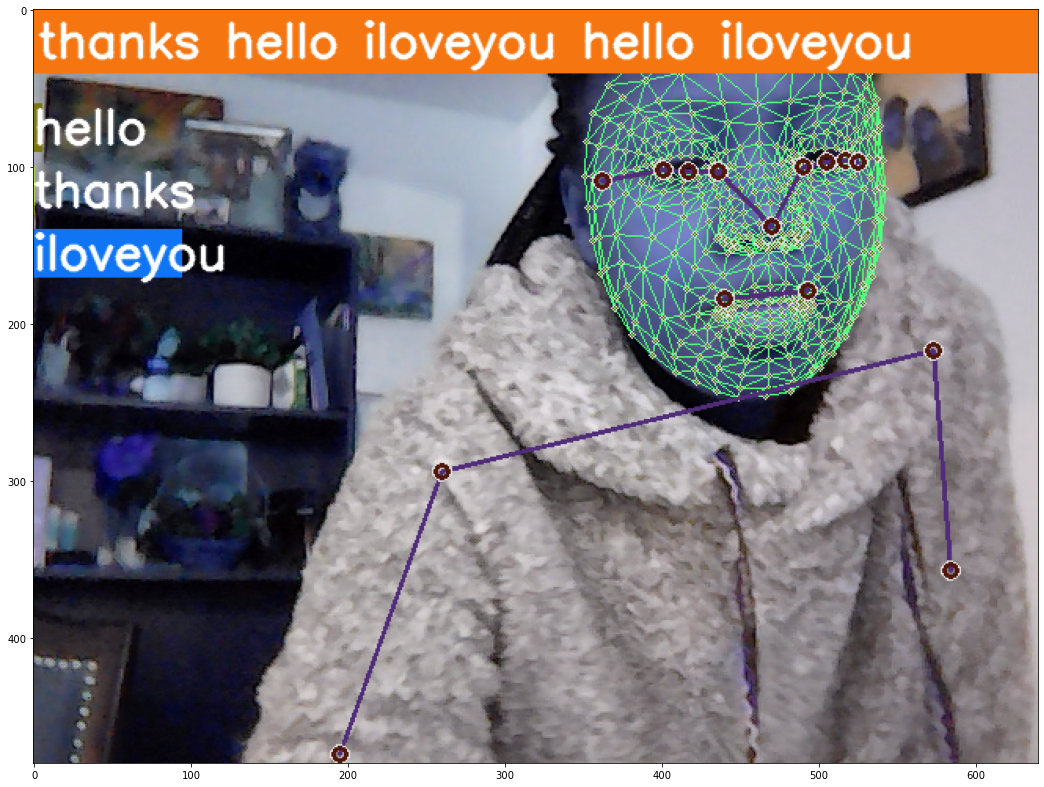

In [84]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [85]:
#New detection variables
sequence = [] #collect our 30 frames inorder to genarate our prediction
sentence = [] #allows us to concatenate our history of predictions
threshold = 0.7 #confidence matrix we rendor results above a certain threshold

cap = cv2.VideoCapture(0) 

#access or set the mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    #double checking that we're still accesing our webcam and loop through all our frames in our webcam
   
    while cap.isOpened():
        #Read feed from our webcam
        ret, frame = cap.read()
        
        #make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        #Draw landmarks
        draw_styled_landmarks(image, results)
        
        #2. Prediction logic
        keypoints = extract_keypoints(results) #
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            #running our prediction
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #Visualization logic
        print(res)
        if (res[np.argmax(res, axis=0)] > threshold).any():   #
            if len(sentence) > 0:
                if actions[np.argmax(res)] != sentence[-1]:
                    sentence.append(actions[np.argmax(res)])
            else:
                sentence.append(actions[np.argmax(res)])
                    
        if len(sentence) > 5:
            sentence = sentence[-5:]
         
        #Viz logic
        image = prob_viz(res, actions, image, colors)
        
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)  
        
        
        
        #print(results)
        #show to the user
        cv2.imshow('Feed', image)
        
        #breaking gracefully going to wait for a key to be pressed inside of our frame
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release() #releases our webcam
    cv2.destroyAllWindows() #closes down our frame

<class 'mediapipe.python.solution_base.SolutionOutputs'>
[5.8171868e-02 1.4843171e-05 9.4181335e-01]
<class 'mediapipe.python.solution_base.SolutionOutputs'>
[5.8171868e-02 1.4843171e-05 9.4181335e-01]
<class 'mediapipe.python.solution_base.SolutionOutputs'>
[5.8171868e-02 1.4843171e-05 9.4181335e-01]
<class 'mediapipe.python.solution_base.SolutionOutputs'>
[5.8171868e-02 1.4843171e-05 9.4181335e-01]
<class 'mediapipe.python.solution_base.SolutionOutputs'>
[5.8171868e-02 1.4843171e-05 9.4181335e-01]
<class 'mediapipe.python.solution_base.SolutionOutputs'>
[5.8171868e-02 1.4843171e-05 9.4181335e-01]
<class 'mediapipe.python.solution_base.SolutionOutputs'>
[5.8171868e-02 1.4843171e-05 9.4181335e-01]
<class 'mediapipe.python.solution_base.SolutionOutputs'>
[5.8171868e-02 1.4843171e-05 9.4181335e-01]
<class 'mediapipe.python.solution_base.SolutionOutputs'>
[5.8171868e-02 1.4843171e-05 9.4181335e-01]
<class 'mediapipe.python.solution_base.SolutionOutputs'>
[5.8171868e-02 1.4843171e-05 9.418

hello
[8.8518858e-01 1.5861013e-10 1.1481144e-01]
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
[8.5185325e-01 1.3836476e-10 1.4814669e-01]
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
[9.2662263e-01 2.3843233e-10 7.3377386e-02]
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
[7.3757398e-01 2.1250016e-10 2.6242602e-01]
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
[8.8886297e-01 6.8365735e-10 1.1113701e-01]
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
[9.1312957e-01 3.5987099e-10 8.6870492e-02]
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
[8.6252248e-01 1.1526153e-09 1.3747750e-01]
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
[9.5980310e-01 5.1958299e-10 4.0196937e-02]
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
[9.2222351e-01 1.3179905e-09 7.7776410e-02]
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
[9.4674641e-01 6.5877781e-10 5.

hello
[6.8102044e-01 1.0356148e-09 3.1897956e-01]
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
[4.5262924e-01 3.1442937e-08 5.4737073e-01]
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
[4.3342951e-01 1.8137988e-09 5.6657046e-01]
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
[3.9084280e-01 1.2159472e-07 6.0915715e-01]
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
[4.5594960e-01 1.3668938e-09 5.4405040e-01]
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
[4.2676783e-01 1.7505085e-08 5.7323211e-01]
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
[6.6411328e-01 7.5319029e-10 3.3588675e-01]
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
[4.2816815e-01 3.6019878e-09 5.7183188e-01]
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
[5.9840947e-01 8.4293114e-11 4.0159050e-01]
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
[8.4601575e-0

<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
[3.6207393e-01 4.0947293e-07 6.3792568e-01]
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
[4.8256615e-01 4.8608587e-07 5.1743335e-01]
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
[3.7594107e-01 5.5787859e-07 6.2405843e-01]
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
[4.5688745e-01 6.2696569e-07 5.4311192e-01]
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
[4.4437829e-01 7.2806120e-07 5.5562097e-01]
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
[3.7404469e-01 6.8260096e-07 6.2595463e-01]
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
[4.1483197e-01 1.0345298e-06 5.8516699e-01]
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
[3.5924500e-01 7.2959085e-07 6.4075428e-01]
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
[3.4787992e-01 1.0663183e-06 6.5211904e-01]
<class 'me

<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
[2.0676816e-01 1.0183804e-07 7.9323173e-01]
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
[2.6609254e-01 5.5340379e-08 7.3390740e-01]
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
[4.8947597e-01 3.5094989e-09 5.1052403e-01]
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
[3.6086845e-01 6.7075533e-08 6.3913143e-01]
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
[1.3852318e-01 2.7252007e-08 8.6147678e-01]
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
[2.8540146e-01 9.7472279e-09 7.1459854e-01]
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
[7.5337246e-02 2.8167781e-08 9.2466277e-01]
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
[3.4200934e-01 4.5950297e-09 6.5799063e-01]
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
[3.5207865e-01 4.9504393e-08 6.4792138e-01]
<class 'me

In [81]:
cap.release()
cv2.destroyAllWindows()

In [67]:
model.predict(X_test)

array([[3.6717183e-04, 2.6852248e-04, 9.9936432e-01],
       [8.4349537e-01, 1.5591048e-01, 5.9419940e-04],
       [3.0320962e-05, 5.6504631e-01, 4.3492338e-01],
       [2.5047410e-02, 1.1640865e-03, 9.7378856e-01],
       [1.1749156e-03, 9.9565840e-01, 3.1666982e-03]], dtype=float32)

In [68]:
np.expand_dims(X_test[0], axis=1).shape

(30, 1, 1662)

In [69]:
res[np.argmax(res)] > threshold

True